<h1>House Price Prediction</h1>
- Aditya Pathak
<br>
Implementing feature engineering<br>
<h4>Acknowledging mentors</h4>
Thanks to Arpit sir, Geshu sir, Sumit sir and Ankit sir

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error,mean_squared_error

<h4>Loading Dataset</h4>

In [2]:
df = pd.read_csv('Housing.csv') # provided by Geshu sir

<h4>Exploring Dataset</h4>

In [3]:
# Stats of dataset

df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [4]:
# Datatype information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# Checking for null values

df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

<h4>Feature Engineering</h4>

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Furnishing status: Ordinal data (categorical with a meaningful order)<br>
We can apply Label Encoding to make it more suitable for model training.<br>
However, we know that sklearn's label encoding uses alphabetical order. Therefore, we manually assign values using .map function.

In [7]:
# Importing Label Encoding
from sklearn.preprocessing import LabelEncoder

In [8]:
df['furnishingstatus'].nunique()

3

In [9]:
# Checking all unique values of 'furnishingstatus' column
df['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

Unfurnished : 1<br>
Semi-Furnished : 2<br>
Furnished : 3

In [10]:
df['furnishingLevel'] = df['furnishingstatus'].map({'unfurnished' : 1,
                                                    'semi-furnished' : 2,
                                                    'furnished' : 3})
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingLevel
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,3
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,3
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,2
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished,3
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished,3
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished,2
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished,2
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished,1
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,3
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,1


Let's explore relationship of price with hotwaterheating and airconditioning.

Text(0.5, 1.0, 'Air Conditioning')

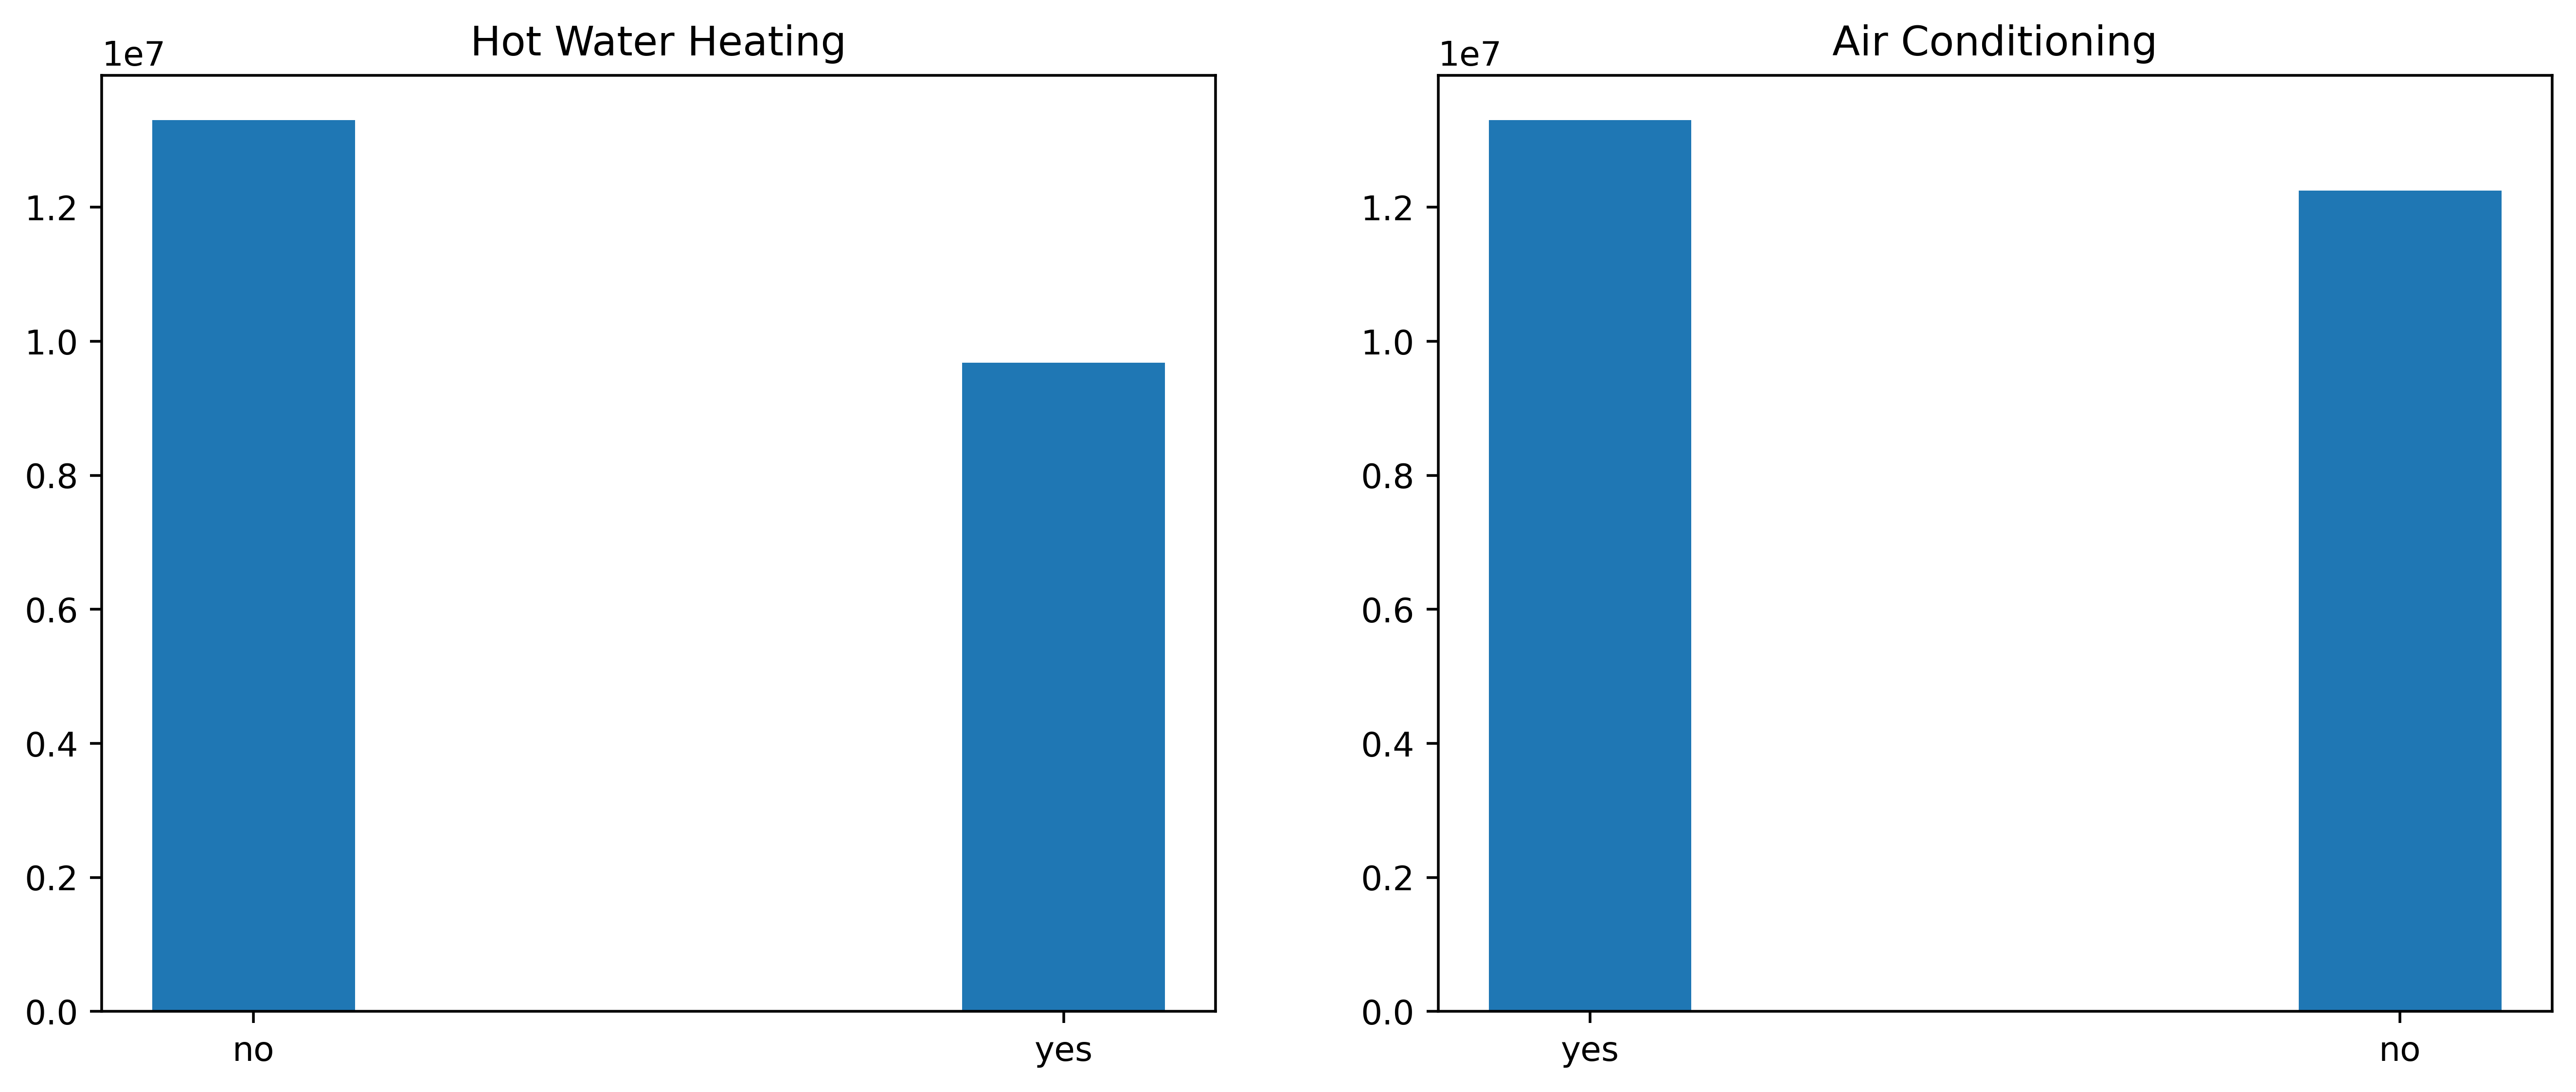

In [11]:
fig = plt.figure(figsize=(13,5),dpi=500)

ax1 = plt.subplot2grid((1,2),(0,0))
plt.bar(df['hotwaterheating'], df['price'], width=.25)
plt.title('Hot Water Heating')

ax2 = plt.subplot2grid((1,2),(0,1))
plt.bar(df['airconditioning'], df['price'], width=.25)
plt.title('Air Conditioning')

Transforming text data (Yes, No) to numerical data (1, 0)

In [12]:
data = df
data['mainroad'] = df['mainroad'].map({'no' : 0,
             'yes' : 1})
data['guestroom'] = df['guestroom'].map({'no' : 0,
             'yes' : 1})
data['basement'] = df['basement'].map({'no' : 0,
             'yes' : 1})
data['hotwaterheating'] = df['hotwaterheating'].map({'no' : 0,
             'yes' : 1})
data['airconditioning'] = df['airconditioning'].map({'no' : 0,
             'yes' : 1})
data['prefarea'] = df['prefarea'].map({'no' : 0,
             'yes' : 1})
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,furnishingLevel
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,3


<h4>Creating Plots</h4>

<Axes: >

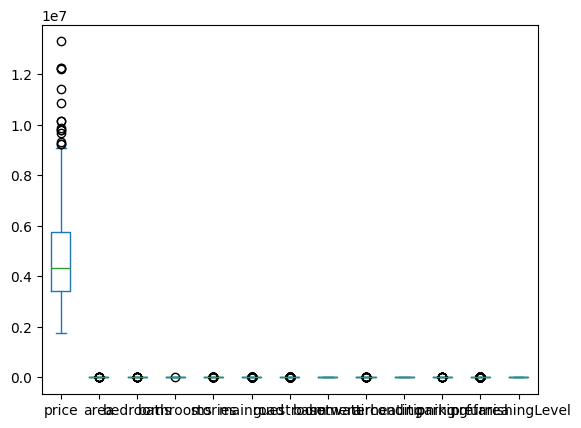

In [13]:
df.plot(kind='box')

<Axes: ylabel='stories'>

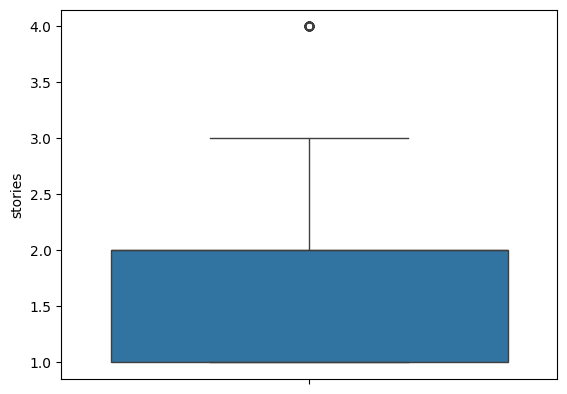

In [14]:
sns.boxplot(y="stories", data=df) # univariate boxplot

<Axes: xlabel='stories', ylabel='price'>

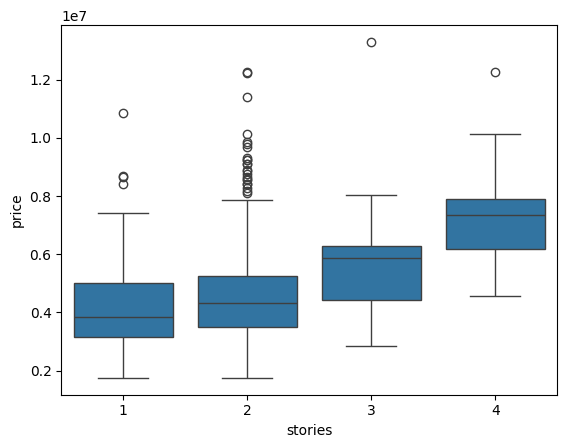

In [15]:
sns.boxplot(x="stories", y="price", data=df) # bivariate boxplot

In [16]:
# Converting to percentages to represent in pie-charts
# value_counts() returns series

bedroomSeries = (df["bedrooms"].value_counts())/df.shape[0] 
print(bedroomSeries)
bathroomSeries = (df["bathrooms"].value_counts())/df.shape[0] 
print(bathroomSeries)
storiesSeries = (df["stories"].value_counts())/df.shape[0] 
print(storiesSeries)
guestroomSeries = (df["guestroom"].value_counts())/df.shape[0] 
print(guestroomSeries)

bedrooms
3    0.550459
2    0.249541
4    0.174312
5    0.018349
6    0.003670
1    0.003670
Name: count, dtype: float64
bathrooms
1    0.735780
2    0.244037
3    0.018349
4    0.001835
Name: count, dtype: float64
stories
2    0.436697
1    0.416514
4    0.075229
3    0.071560
Name: count, dtype: float64
guestroom
0    0.822018
1    0.177982
Name: count, dtype: float64


In [17]:
# Converting to dictionaries to utilise key-value pairs when plotting pie charts

bedroomDict = bedroomSeries.to_dict()
bathroomDict = bathroomSeries.to_dict()
storiesDict = storiesSeries.to_dict()
guestroomDict = guestroomSeries.to_dict()

In [18]:
# Subplotting 4 pie charts for Bedrooms, Bathrooms, Stories, Guestrooms

fig = plt.figure(figsize=(14,10),dpi=1000)

ax1 = plt.subplot2grid((2,2),(0,0))
plt.pie(bedroomDict.values(), labels=bedroomDict.keys(), autopct = "%1.0f%%")
plt.title("Distribution of number of bedrooms")

ax1 = plt.subplot2grid((2,2),(0,1))
plt.pie(bathroomDict.values(), labels=bathroomDict.keys(), autopct = "%1.0f%%")
plt.title("Distribution of number of bathrooms")

ax1 = plt.subplot2grid((2,2),(1,0))
plt.pie(storiesDict.values(), labels=storiesDict.keys(), autopct = "%1.0f%%")
plt.title("Distribution of number of stories")

ax1 = plt.subplot2grid((2,2),(1,1))
plt.pie(guestroomDict.values(), labels=guestroomDict.keys(), autopct = "%1.0f%%")
plt.title("Distribution of guestroom availablity")

Text(0.5, 1.0, 'Distribution of guestroom availablity')

<h4>Model Training</h4>

In [19]:
data = df.drop('furnishingstatus', axis = 1)
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingLevel
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,3
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,3
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,2
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,3
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,3


In [20]:
data.shape

(545, 13)

In [21]:
# Importing libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(0) # so that train and test datasets always have the same rows
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3)

In [22]:
df_train.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingLevel'],
      dtype='object')

Applying Min Max Scaling

In [23]:
# Importing
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler()

In [25]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'furnishingLevel', 'parking', 'price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingLevel
454,0.120606,0.193548,0.5,0.0,0.333333,1,0,0,0,1,0.0,0,0.0
392,0.151515,0.156495,0.5,0.0,0.333333,1,0,0,0,0,0.0,0,0.5
231,0.254545,0.180471,0.5,0.0,0.000000,1,0,0,0,0,0.0,1,0.5
271,0.224242,0.005013,1.0,0.0,0.333333,0,0,1,0,0,0.0,0,0.5
250,0.239394,0.121622,0.5,0.0,0.666667,1,0,0,0,0,0.0,0,0.5


In [26]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingLevel
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.261309,0.234612,0.486877,0.140420,0.272966,0.866142,0.173228,0.335958,0.044619,0.330709,0.239720,0.241470,0.465879
std,0.162240,0.143585,0.178144,0.241909,0.291449,0.340948,0.378942,0.472945,0.206738,0.471087,0.291673,0.428537,0.380638
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.145455,0.130340,0.250000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.227879,0.197908,0.500000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.345455,0.328684,0.500000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
df_train.shape

(381, 13)

In [28]:
df_test.shape

(164, 13)

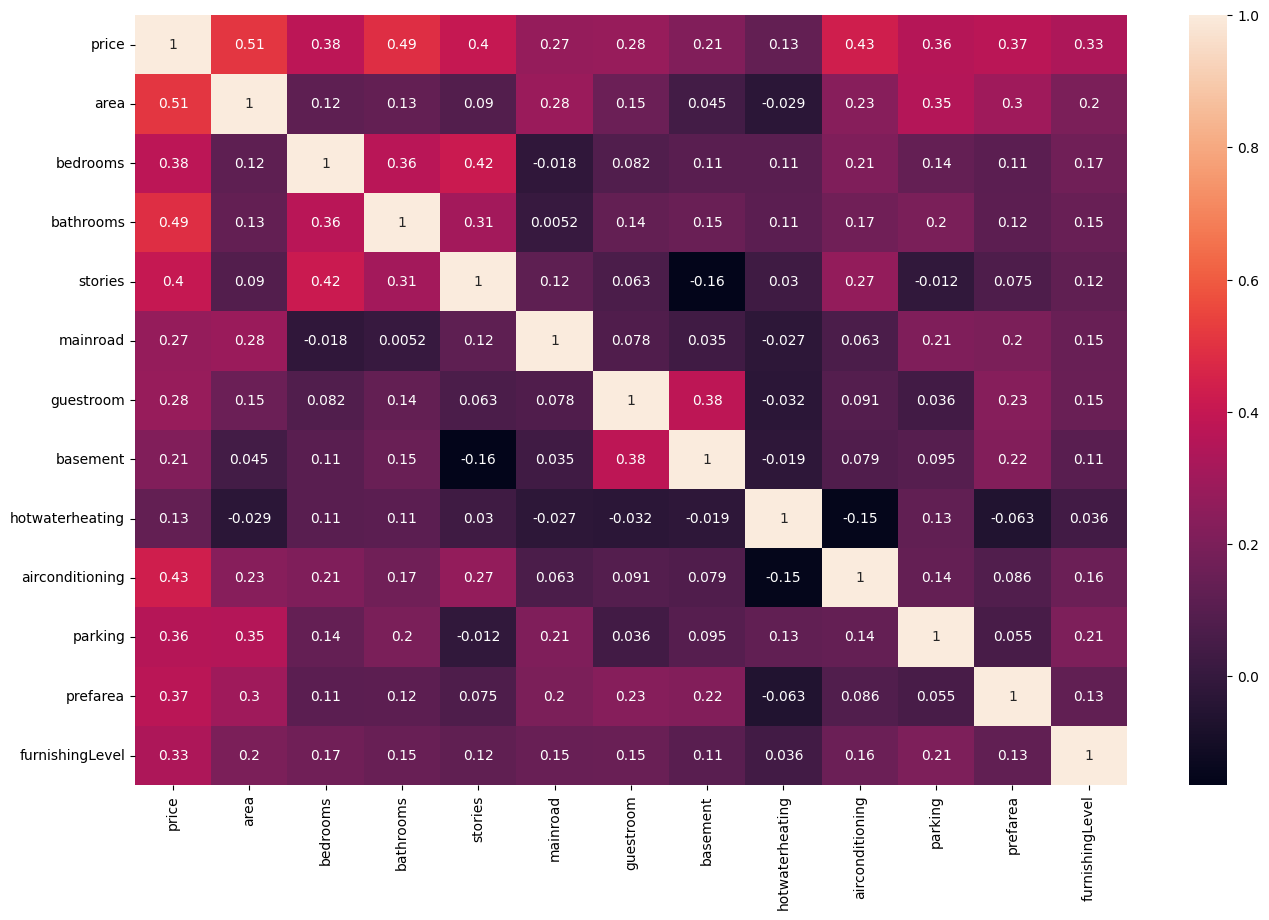

In [29]:
# Checking correlation coefficients
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True)
plt.show()

Price and area are correlated the most.

In [30]:
y_train = df_train['price']
# x_train = df_train.drop(columns=['price'],axis=1)
x_train = df_train[['area','bedrooms','bathrooms','airconditioning','stories','prefarea']]

In [31]:
x_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'airconditioning', 'stories',
       'prefarea'],
      dtype='object')

In [32]:
y_train.shape

(381,)

In [33]:
x_train.shape

(381, 6)

In [34]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [35]:
y_test = df_test['price']
# x_test = df_test.drop(columns=['price'],axis=1)
x_test = df_test[['area','bedrooms','bathrooms','airconditioning','stories','prefarea']]

In [36]:
x_test

,area,bedrooms,bathrooms,airconditioning,stories,prefarea
239,4000,3,1,0,2,0
113,9620,3,1,0,1,1
325,3460,4,1,1,2,0
66,13200,2,1,0,1,0
479,3660,4,1,0,2,0
...,...,...,...,...,...,...
477,4960,2,1,0,1,0
505,4000,3,1,1,2,0
347,3350,3,1,0,2,0
224,10240,2,1,1,1,1


In [37]:
y_test

239    4585000
113    6083000
325    4007500
66     6930000
479    2940000
        ...   
477    2940000
505    2653000
347    3836000
224    4760000
38     7962500
Name: price, Length: 164, dtype: int64

In [38]:
output_price=lm.predict(x_test)

In [39]:
len(output_price)

164

In [40]:
x_test.shape

(164, 6)

In [41]:
print(lm.score(x_test, y_test))

-6.535304964545549


In [42]:
mean_squared_error(y_test,output_price)

26138273986420.895

In [43]:
importance = lm.coef_[0]
print(lm.coef_)

[0.37829473 0.08132751 0.2014672  0.07683739 0.09395385 0.07320264]


In [44]:
x_train.columns

Index(['area', 'bedrooms', 'bathrooms', 'airconditioning', 'stories',
       'prefarea'],
      dtype='object')

<b>26th December, 2023</b><br>
Studied Feature Engineering and Feature Scaling and implemented them in the notebook from Day 2.<br>
Also trained the model.